In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
def f(x):
    return x**2 - 4*x + 10

In [17]:
f(2.0)

6.0

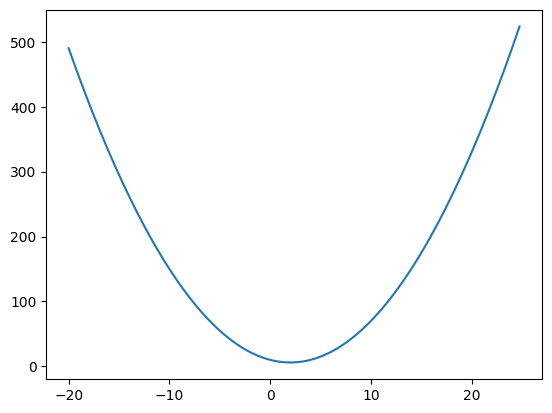

In [25]:
xs = np.arange(-20,25, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.show()

In [2]:
class Value:

    def __init__(self, data, _children=(), _op=''):
        self.data = data                  # This stores the actual numeric value
        self._prev = set(_children)      # This keeps track of which Value objects were used to compute this one (for backpropagation)
        self._op = _op                   # This stores the operation that produced this Value ('+', '-', '*', etc.) — useful for visualizing the computation graph

    def __repr__(self):
        return f"Value(data={self.data})"  # Used to print the object nicely
    
    # When we perform the operations listed below on an two Value objects, we return a new Value that contains:
        # - the result of the addition
        # - a reference to the inputs (self and other) as children
        # - the operation used to create this node ('+')
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out
    
    def __sub__(self, other):
        out = Value(self.data - other.data, (self, other), '-')
        return out
    

a = Value(2.0)
b = Value(3.0)
c = Value(4.0)
d = a + b * c - b
d

Value(data=11.0)